In [2]:
import torch
import torchvision
from torchvision import transforms
import os
from models.YNet import YNet
import matplotlib.pyplot as plt
import numpy as np

In [49]:
def plot_filters_multi_channel(t):
    
    #get the number of kernals
    num_kernels = t.shape[0]    
    
    #define number of columns for subplots
    num_cols = 12
    #rows = num of kernels
    num_rows = num_kernels
    
    #set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    #looping through all the kernels
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        #for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i].numpy(), np.float32)
        #standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
    plt.savefig('myimage.png', dpi=100)    
    plt.tight_layout()
    plt.show()

In [50]:
def plot_filters_single_channel(t):
    
    #kernels depth * number of kernels
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(max(t.shape[0], 32)):
        for j in range(3):         #t.shape[1]
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [40]:
def plot_image(t):
    
    #kernels depth * number of kernels
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(t.shape[0]):
        count += 1
        ax1 = fig.add_subplot(nrows, ncols, count)
        npimg = np.array(t[i].numpy(), np.float32)
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        ax1.imshow(npimg)
        ax1.set_title(str(i))
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [11]:
dataset = 'cifar10'
data_dir = '/home/gaurangajitk/DL/data'
data_root = os.path.join(data_dir, dataset)
num_classes = 10 if dataset=='cifar10' else 100

config = {
    "n_classes": num_classes,
    "batch_size": 1024,
    "lr": 1e-3,
    "gradient_clip_val": 0.5,
    "num_epochs": 50,
    "cnn1_in": 3,
    "cnn2_in": 32,
    "cnn3_in": 64,
    "cnn3_out": 128,
    "linear_in": 1024,
    "linear_hidden": 512,
    "dropout": 0.5,
    "kernel_size": 3
}

print(config)
PATH = f"/home/gaurangajitk/DL/cnn_YNet/model_checkpoint/best_checkpoint_{dataset}.pth"

{'n_classes': 10, 'batch_size': 1024, 'lr': 0.001, 'gradient_clip_val': 0.5, 'num_epochs': 50, 'cnn1_in': 3, 'cnn2_in': 32, 'cnn3_in': 64, 'cnn3_out': 128, 'linear_in': 1024, 'linear_hidden': 512, 'dropout': 0.5, 'kernel_size': 3}


In [13]:
data_transforms = transforms.Compose([ transforms.ToTensor(),\
         transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
trainset = torchvision.datasets.CIFAR10(root=data_root, train=True,
                                    download=True, transform=data_transforms)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=config['batch_size'], shuffle=True, num_workers=1)


Files already downloaded and verified


In [14]:
first = next(iter(train_loader))

In [42]:
i = 1
x, y = first[0], first[1]
image, label = x[i], y[i]
label

tensor(2)

In [6]:
model = YNet(config)

In [7]:
checkpoint = torch.load(PATH, map_location='cpu')
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [58]:
filter = model.cnn_right.conv1.weight.data
filter.shape

torch.Size([32, 3, 3, 3])

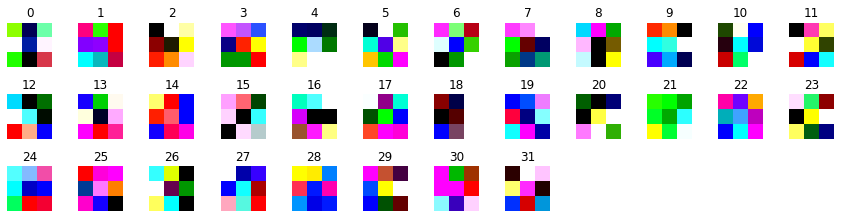

In [59]:
plot_filters_multi_channel(filter)

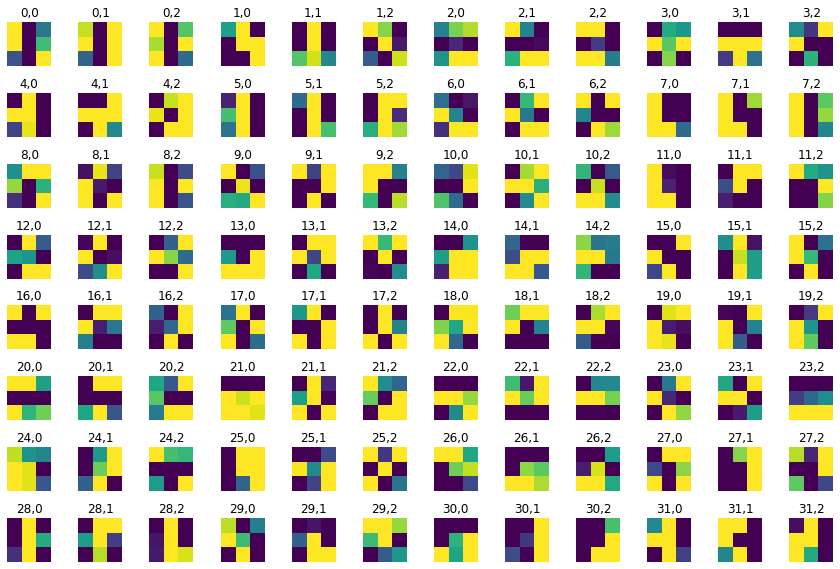

In [10]:
plot_filters_single_channel(filter)

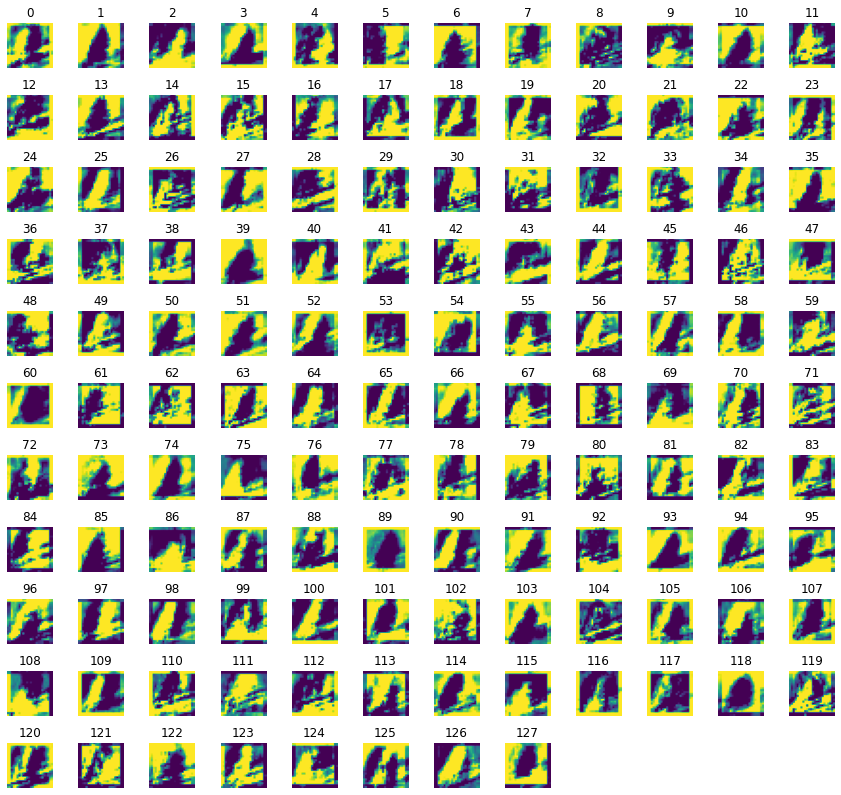

In [65]:
im_out = model.cnn_right.conv3(model.cnn_right.conv2(model.cnn_right.conv1(image[None, :]))).detach()
im_out = torch.squeeze(im_out)
plot_image(im_out)

(-0.5, 31.5, 31.5, -0.5)

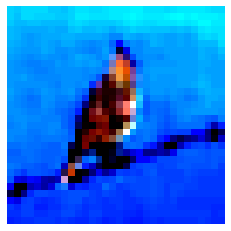

In [43]:
npimg = np.array(image.numpy(), np.float32)
npimg = (npimg - np.mean(npimg)) / np.std(npimg)
npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
npimg = npimg.transpose((1, 2, 0))
plt.imshow(npimg)
plt.axis('off')